## 參考連結

1. [Dijkstra's Algorithm - Example](http://siddarthareddy.weebly.com/blog/dijkstras-algorithm-example)
2. [GeeksforGeeks - Dijkstra's Algorithm](https://www.geeksforgeeks.org/python-program-for-dijkstras-shortest-path-algorithm-greedy-algo-7/)
3. [BogoToBogo - DIJKSTRA'S SHORTEST PATH ALGORITHM](https://www.bogotobogo.com/python/python_Dijkstras_Shortest_Path_Algorithm.php)
4. [MBA智庫百科 - Dijkstra's Algorithm](https://wiki.mbalib.com/zh-tw/Dijkstra%E7%AE%97%E6%B3%95)
5. [Kruskal’s Minimum Spanning Tree Algorithm | Greedy Algo-2](https://www.geeksforgeeks.org/kruskals-minimum-spanning-tree-algorithm-greedy-algo-2/)

## Dijkstra Algorithm Introduction

Dijkstra's algorithm是一種找從某個點到其他點的最短路徑的演算法，又稱為Single Source Shortest Path(單源最短路徑)。

這個演算法的基本原理是：每次新拜訪一個距離最短的點，更新與其相鄰的點的距離。當所有Edge Cost都大於0小於無限大時，由於不會存在一個距離更短的沒擴展過的點，所以這個點的距離永遠不會再被改變，因而保證了演算法的正確性。由於這樣的特性，這個演算法的前提是Edge Cost不得為負數，不然就無法保證不存在距離更短的點。

著重在於點的訪問，每次選擇與起點距離最短的節點，再藉由該節點向外擴展，透過不斷的訪問和更新距離，所有和起點的距離就確定下來且為與起點最近的距離。

## Dijkstra Algorithm on Graph 流程圖

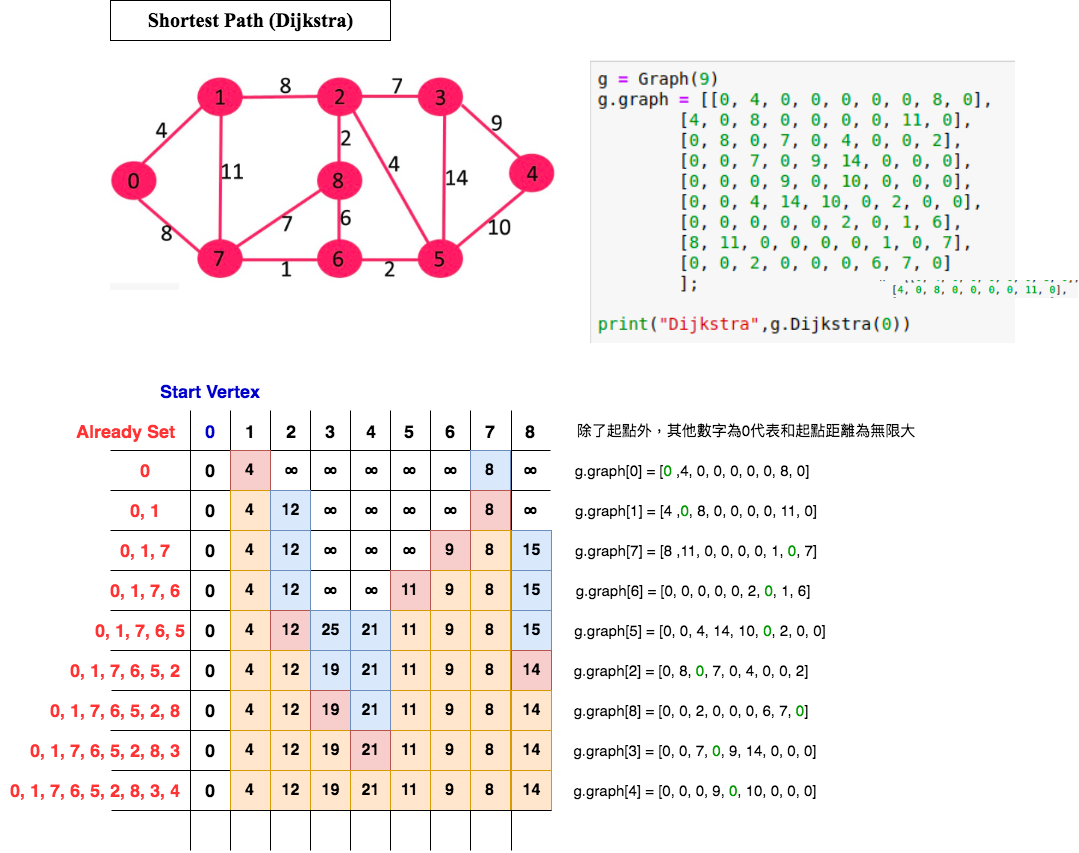

In [1]:
from IPython.display import Image
Image(filename = "Dijkstra.png", height = 1000, width = 1500)

## 我對Dijkstra的想法：

1. 創建一個Array，此Array存放已確定最短路徑的Vertice。
2. 從s開始，將s加入Array。
3. 掃描g.graph[s]，並依條件將值依序更新g.graph_matrix[0]:
    + 將g.graph[s][s]在g.graph_matrix[0]裡設為0，此0代表是起點。
    + 將g.graph[s]非0者直接填入g.graph_matrix[0]
    + 將g.graph[s]為0者在g.graph_matrix[0]填入float('inf')，表示尚未能到達
4. 當已確定最短路徑的vetices的個數小於所有vertice的個數
    + 將g.graph_matrix[i]的最小值v挑出，並加入Array。
        + 若同時有兩個最小值，則放入較小的vertice。
    + 將g.graph[v] 加上 g.graph_matrix[i][v]，並同時將g.graph_matrix[i]複製成g.graph_matrix[i+1]，將這兩個比大小:
        + 若 i 已出現在Array中: 那g.graph_matrix[i+1][i] 不動
        + 若 g.grpah[v][i] < g.graph_matrix[i+1][i]: 那麼g.graph_matrix[1][i] = g.grpah[v][i]
        + 若 g.grpah[v][i] >= g.graph_matrix[i+1][i]: 不動



## Kruskal Algorithm Introduction

Kruskal Algorithm是用來找Minimum Spanning Tree的一種演算法，然在這之前必須先瞭解什麼是Spanning Tree: 

1. Spanning Tree指的是一個有向圖或無向圖中，以Tree的形式連結所有的節點的子圖。

2. 每一個圖會有很多不同的子圖，而Minimum Spanning Tree指的就是在一個有權重的有向圖或無向圖中的Spanning Tree，且權重的加總少於等於其他任何一個的Spanning Tree。

Kruskal Algorithm 是用來找MST的一種演算法，而Kruskal Algorithm是以增加邊的概念為出發點。

這個演算法的基本原理是：首先將所有的邊依權重大小排序，再依序加入權重最小的邊，如果造成Cycle的話就必須捨棄，直到增加了V-1條邊為止(V表示節點個數)。

## Kruskal Algorithm 流程圖

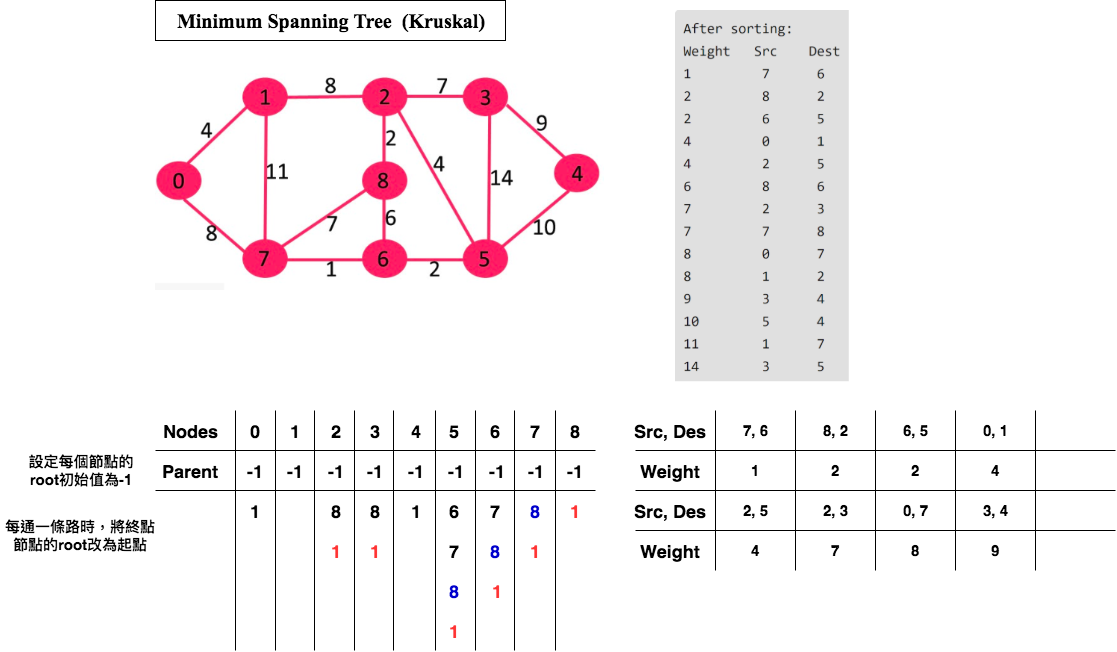

In [52]:
from IPython.display import Image
Image(filename = "Kruskal.png", height = 1000, width = 1500)

## 我對Kruskal的想法：

1. 建立Array儲存每一個Vertex的Parent，而預設每一個Vertex的Parent是-1。
2. 創建Dict存放MST的點和邊。
3. 將Adjacency List依照權重由小排到大。
4. 由小而大將邊依序加入Dict:
    + 當起點和終點的Parent不一樣時，將邊加入Dict，並且將終點的Parent改成起點的Parent。
    + 當起點和終點的Parent一樣時，不將邊加入Dict。


## 程式碼

In [49]:
from collections import defaultdict 

class Graph(): 

    def __init__(self, vertices): 
        self.V = vertices 
        self.graph = [] 
        self.graph_matrix = [[0 for column in range(vertices)]  
                    for row in range(vertices)] 
    
    def Dijkstra(self, s):
        visited_array = [s] # 加入起點
        pointer = 0
        for i in range(len(self.graph[s])): 
            if self.graph[s][i] > 0: #當起點能到達別的節點時，距離直接填入相應位置
                self.graph_matrix[0][i] = self.graph[s][i]
            else: # 當起點到達不了別的節點時，將距離設為無限大
                self.graph_matrix[0][i] = float('inf')
        self.graph_matrix[0][s] = 0 # 起點與起點的距離為0
        pointer += 1
        
        while len(visited_array) < len(g.graph): # 當被加入的節點
            self.graph_matrix[pointer] = self.graph_matrix[pointer - 1] # 複製上一個graph_matrix再做改動
            v = self.find_min_vertice(visited_array, self.graph_matrix[pointer]) # 找出本輪要加入的節點
            visited_array.append(v)
            compare_distance = [self.graph[v][i] + self.graph_matrix[pointer][v] for i in range(len(self.graph[v]))] # 將該節點和其他點的距離加上自己和起點的距離
            for i in range(len(self.graph[v])):
                if i in visited_array: # 當節點已經被加入後，直接略過
                    pass
                elif self.graph[v][i] == 0: # 當該節點到不了別的節點時，直接略過
                    pass
                else:
                    if compare_distance[i] < self.graph_matrix[pointer][i]: # 當該節點的讓別的點和起點的距離變短時，將距離更新
                        self.graph_matrix[pointer][i] = compare_distance[i]     
            pointer += 1
        return self.create_Dijkstra_dict(self.graph_matrix[len(self.graph)-1]) # 回傳最後的ShortestPath
                   
    def find_min_vertice(self, visited_array ,graph_array): # 在每加入一次新節點前要先找到距離最小值，以此來確定要加入哪個節點
        min_val = min([graph_array[i] for i in range(len(graph_array)) if graph_array[i] > 0 if i not in visited_array]) # 篩選 沒被加入過的節點和不是起點的節點的最小距離
        for i in range(len(graph_array)):
            if graph_array[i] == min_val: # 當有兩個節點和起點的距離一樣小的時候，回傳數字靠前的節點。
                return i
               
    def create_Dijkstra_dict(self, final_array): # 最後產出的Dict
        Di_dict = defaultdict(list)
        for i in range(len(final_array)):
            Di_dict[str(i)] = final_array[i]
        Di_dict = dict(Di_dict)
        return Di_dict
        

In [50]:
g = Graph(9)
g.graph = [[0,4,0,0,0,0,0,8,0], 
          [4,0,8,0,0,0,0,11,0], 
          [0,8,0,7,0,4,0,0,2], 
          [0,0,7,0,9,14,0,0,0], 
          [0,0,0,9,0,10,0,0,0], 
          [0,0,4,14,10,0,2,0,0],
          [0,0,0,0,0,2,0,1,6],
          [8,11,0,0,0,0,1,0,7],
          [0,0,2,0,0,0,6,7,8]]
print('Dijkstra',g.Dijkstra(0))

Dijkstra {'0': 0, '1': 4, '2': 12, '3': 19, '4': 21, '5': 11, '6': 9, '7': 8, '8': 14}


In [51]:
g = Graph(3)
g.graph = [[0,1,0], 
          [1,0,2], 
          [0,2,0]]
print('Dijkstra',g.Dijkstra(2))

Dijkstra {'0': 3, '1': 2, '2': 0}
